In [1]:
import numpy as np
import pandas as pd

In [2]:
import os

# Get the current working directory
current_directory = os.getcwd()
print("Current Directory:", current_directory)

Current Directory: C:\Users\6sukr


In [3]:
df = pd.read_csv(r"C:\Users\6sukr\Downloads\spam.csv", encoding='latin-1')

In [4]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
1689,ham,Bring tat cd don forget,NaN,NaN,NaN
3028,ham,What is your record for one night? :),NaN,NaN,NaN
1811,ham,Do Ì_ all wan 2 meet up n combine all the part...,NaN,NaN,NaN
3747,ham,"A bit of Ur smile is my hppnss, a drop of Ur t...",NaN,NaN,NaN
5068,ham,Hai dear friends... This is my new &amp; prese...,NaN,NaN,NaN


In [5]:
df.shape

(5572, 5)

# 1. Data Cleaning

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [7]:
# drop last 3 columns
df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'],inplace=True)

In [8]:
df.sample(5)

,v1,v2
528,spam,You will recieve your tone within the next 24h...
177,ham,Turns out my friends are staying for the whole...
1269,ham,"Tee hee. Off to lecture, cheery bye bye."
3981,ham,His frens go then he in lor. Not alone wif my ...
3341,ham,You will go to walmart. I.ll stay.


In [9]:
# renaming the columns
df.rename(columns={'v1':'target','v2':'text'},inplace=True)
df.sample(5)

,target,text
4629,ham,Everybody had fun this evening. Miss you.
3131,ham,I've been barred from all B and Q stores for l...
3262,ham,So u gonna get deus ex?
4146,ham,Pls help me tell sura that i'm expecting a bat...
2227,ham,Oh k.k..where did you take test?


In [10]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [11]:
df['target'] = encoder.fit_transform(df['target'])

In [12]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [13]:
# missing values
df.isnull().sum()

target    0
text      0
dtype: int64

In [14]:
# check for duplicate values
df.duplicated().sum()

403

In [15]:
# remove duplicates
df = df.drop_duplicates(keep='first')

In [16]:
df.duplicated().sum()

0

In [17]:
df.shape

(5169, 2)

# 2. Exploratory Data Analysis (EDA)

In [18]:
df.head

<bound method NDFrame.head of       target                                               text
0          0  Go until jurong point, crazy.. Available only ...
1          0                      Ok lar... Joking wif u oni...
2          1  Free entry in 2 a wkly comp to win FA Cup fina...
3          0  U dun say so early hor... U c already then say...
4          0  Nah I don't think he goes to usf, he lives aro...
...      ...                                                ...
5567       1  This is the 2nd time we have tried 2 contact u...
5568       0              Will Ì_ b going to esplanade fr home?
5569       0  Pity, * was in mood for that. So...any other s...
5570       0  The guy did some bitching but I acted like i'd...
5571       0                         Rofl. Its true to its name

[5169 rows x 2 columns]>

In [19]:
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

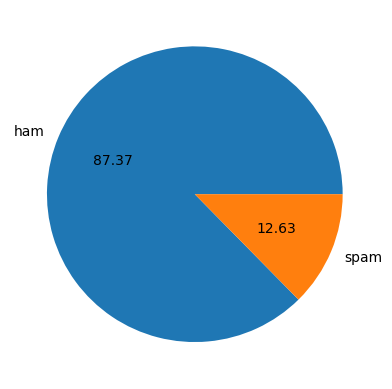

In [20]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(), labels=['ham', 'spam'],autopct="%0.2f")
plt.show()

Result:- Data is inbalanced

In [21]:
import nltk

In [22]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\6sukr\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [23]:
df['num_characters'] = df['text'].apply(len)

In [24]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [25]:
# num of words
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [26]:
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [27]:
df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [28]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [29]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [30]:
# ham
df[df['target'] == 0][['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [31]:
# spam
df[df['target'] == 1][['num_characters', 'num_sentences', 'num_words']].describe()

,num_characters,num_sentences,num_words
count,653.000000,653.000000,653.000000
mean,137.891271,2.970904,27.667688
std,30.137753,1.488425,7.008418
min,13.000000,1.000000,2.000000
25%,132.000000,2.000000,25.000000
50%,149.000000,3.000000,29.000000
75%,157.000000,4.000000,32.000000
max,224.000000,9.000000,46.000000


In [32]:
import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

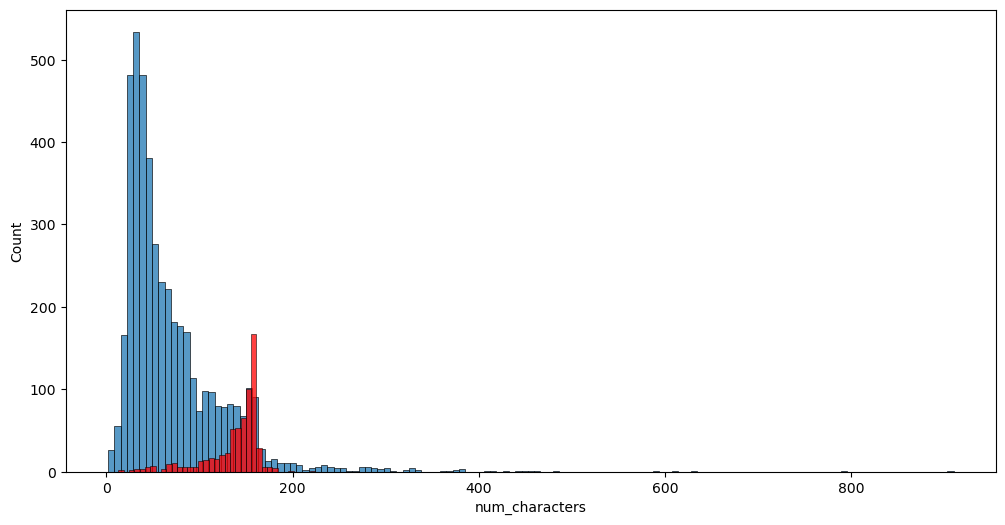

In [33]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_characters'])
sns.histplot(df[df['target'] == 1]['num_characters'],color='red')

<Axes: xlabel='num_words', ylabel='Count'>

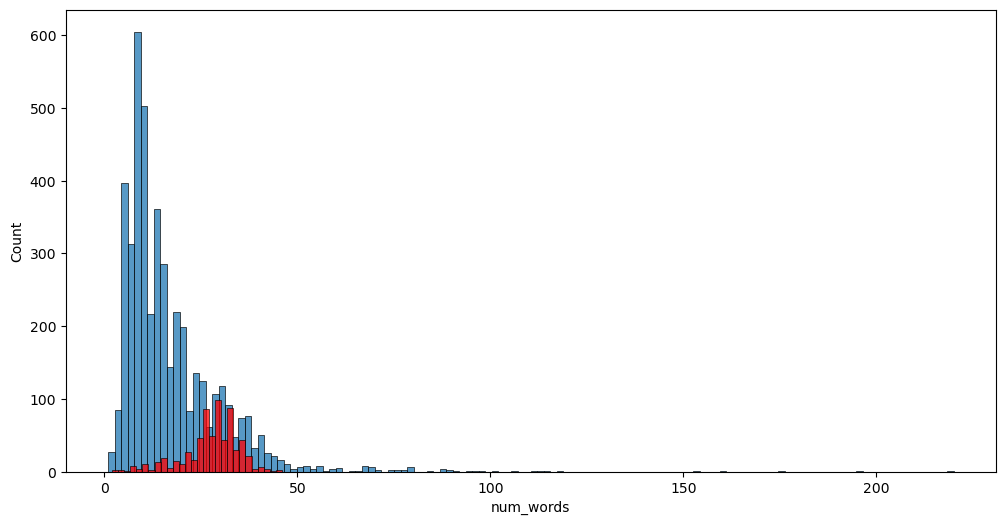

In [34]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_words'])
sns.histplot(df[df['target'] == 1]['num_words'],color='red')

<Axes: xlabel='num_sentences', ylabel='Count'>

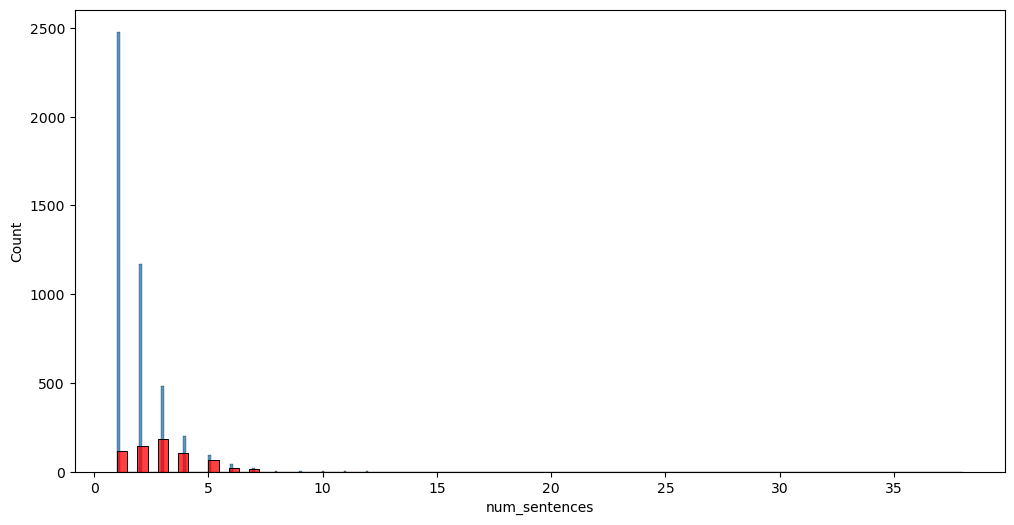

In [35]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_sentences'])
sns.histplot(df[df['target'] == 1]['num_sentences'],color='red')

C:\Users\6sukr\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


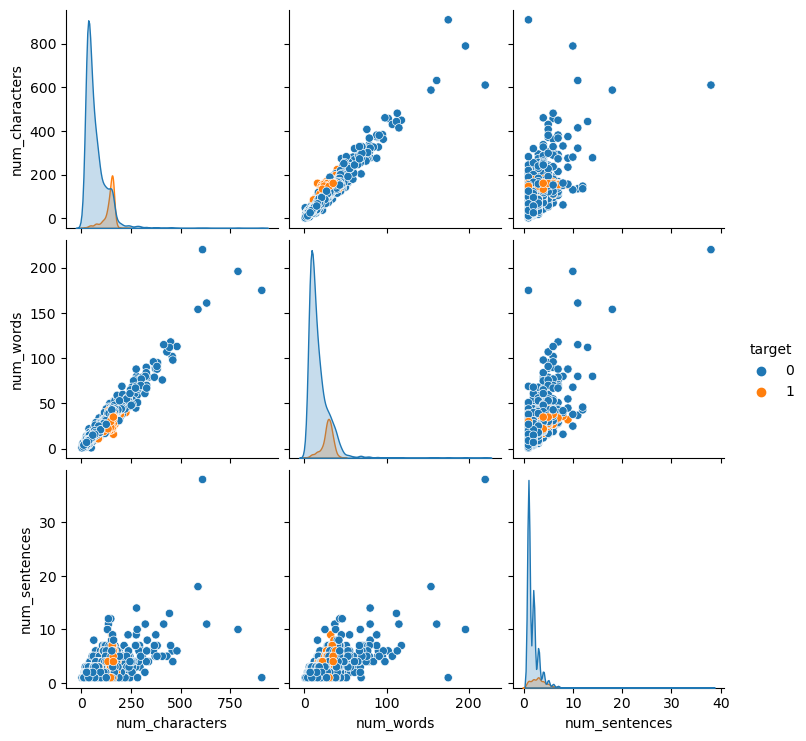

In [46]:
sns.pairplot(df,hue='target')

In [36]:
# Select only numeric columns for correlation computation
numeric_df = df.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numeric_df.corr()

<Axes: >

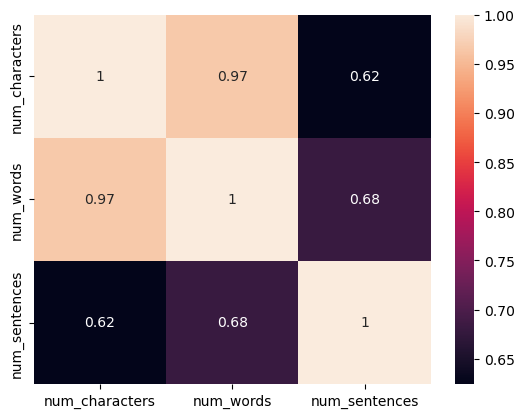

In [37]:
sns.heatmap(numeric_df.corr(),annot=True)

# 3. Data Preprocessing

a) Lower Case
b) Tokenization
c) Removing special characters
d) Removing stop words and punctuation
e) Stemming

In [38]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    y = []
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
            
    text = y
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    return y

In [39]:
from nltk.corpus import stopwords
import string

def transform_text(text):
    y = []
    for i in text.split():
        if i.lower() not in stopwords.words('english') and i.lower() not in string.punctuation:
            y.append(i)
    return ' '.join(y)

# Example usage:
result = transform_text('Hi How are you Sukrit?')
print(result)

Hi Sukrit?


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\6sukr\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [40]:
df['text'][2000]

"But i'll b going 2 sch on mon. My sis need 2 take smth."

In [41]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('loving')

'love'

In [42]:
df['transformed_text'] = df['text'].apply(transform_text)

In [43]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,"Go jurong point, crazy.. Available bugis n gre..."
1,0,Ok lar... Joking wif u oni...,29,8,2,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,Free entry 2 wkly comp win FA Cup final tkts 2...
3,0,U dun say so early hor... U c already then say...,49,13,1,U dun say early hor... U c already say...
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,"Nah think goes usf, lives around though"


In [55]:
!pip install wordcloud

In [45]:
from wordcloud import WordCloud

wc = WordCloud(width=500, height=500, min_font_size=10, background_color='white')

In [46]:
spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep=" "))

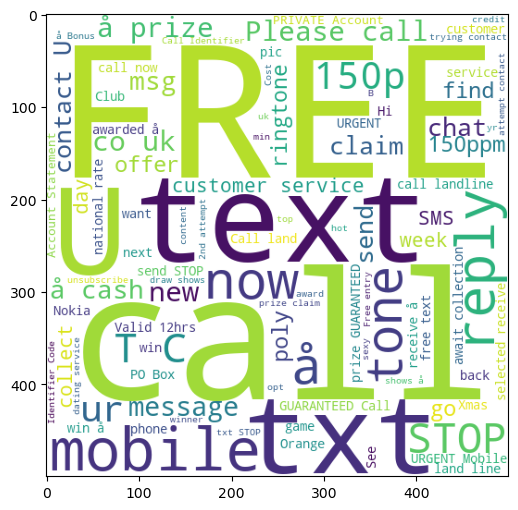

In [47]:
plt.figure(figsize=(12,6))
plt.imshow(spam_wc)

In [48]:
ham_wc = wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep=" "))

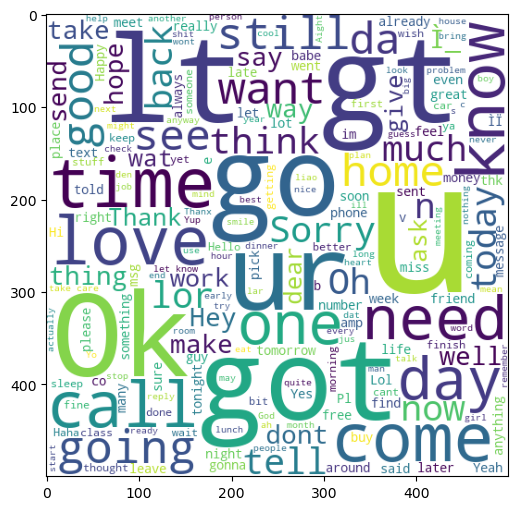

In [60]:
plt.figure(figsize=(12,6))
plt.imshow(ham_wc)

In [49]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,"Go jurong point, crazy.. Available bugis n gre..."
1,0,Ok lar... Joking wif u oni...,29,8,2,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,Free entry 2 wkly comp win FA Cup final tkts 2...
3,0,U dun say so early hor... U c already then say...,49,13,1,U dun say early hor... U c already say...
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,"Nah think goes usf, lives around though"


In [50]:
spam_corpus=[]
for msg in df[df['target'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [51]:
len(spam_corpus)

11075

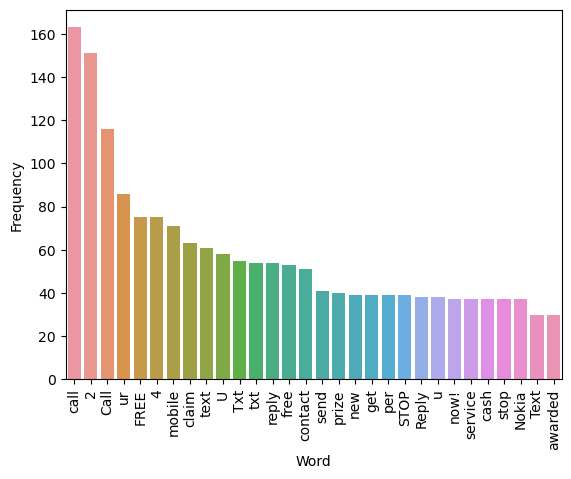

In [52]:
from collections import Counter
counts = Counter(spam_corpus).most_common(30)
data = pd.DataFrame(counts, columns=['Word', 'Frequency'])
sns.barplot(x='Word', y='Frequency', data=data)
plt.xticks(rotation='vertical')
plt.show()

In [53]:
ham_corpus = []
for msg in df[df['target'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [54]:
len(ham_corpus)

38351

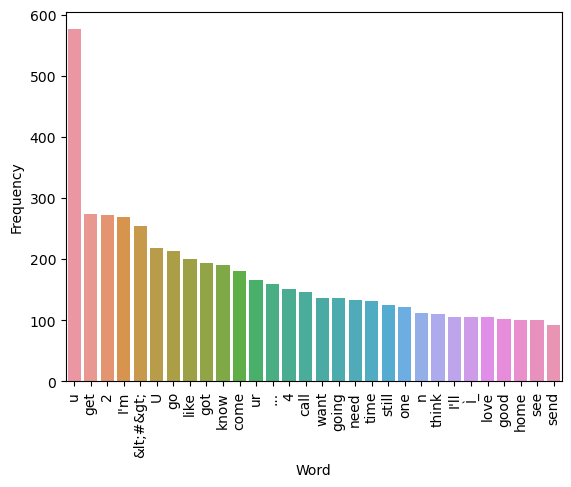

In [55]:
from collections import Counter
counts = Counter(ham_corpus).most_common(30)
data = pd.DataFrame(counts, columns=['Word', 'Frequency'])
sns.barplot(x='Word', y='Frequency', data=data)
plt.xticks(rotation='vertical')
plt.show()

In [56]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,"Go jurong point, crazy.. Available bugis n gre..."
1,0,Ok lar... Joking wif u oni...,29,8,2,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,Free entry 2 wkly comp win FA Cup final tkts 2...
3,0,U dun say so early hor... U c already then say...,49,13,1,U dun say early hor... U c already say...
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,"Nah think goes usf, lives around though"


# 4. Model Building

In [57]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [58]:
X = cv.fit_transform(df['transformed_text']).toarray()

In [59]:
X.shape

(5169, 8650)

In [60]:
# appending the num_character column to x
X = np.hstack((X,df['num_characters'].values.reshape(-1,1)))

In [61]:
y = df['target'].values

In [62]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [63]:
from sklearn.model_selection import train_test_split

In [64]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [65]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB

In [66]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [67]:
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [68]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.9177949709864603
[[826  70]
 [ 15 123]]
0.6373056994818653


In [69]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9806576402321083
[[889   7]
 [ 13 125]]
0.946969696969697


In [70]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.97678916827853
[[893   3]
 [ 21 117]]
0.975


In [71]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [84]:
!pip install xgboost

In [79]:
from xgboost import XGBClassifier

In [80]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)  
lrc = LogisticRegression(solver='liblinear', penalty='l1')  
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50, random_state=2)
xgb = XGBClassifier(n_estimators=50, random_state=2)

In [74]:
clfs = {
    'SVC' : svc,
    'KN' : knc,
    'NB' : mnb,
    'DT' : dtc,
    'LR' : lrc,
    'RF' : rfc,
    'AdaBoost' : abc,
    'BgC' : bc,
    'ETC' : etc,
    'GBDT' : gbdt,
    'xgb' : xgb
}

In [75]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy= accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy, precision

In [76]:
train_classifier(svc, X_train, y_train, X_test, y_test)

C:\Users\6sukr\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


(0.8665377176015474, 0.0)

In [77]:
accuracy_scores = []
precision_scores = []

for name, clf in clfs.items():
    current_accuracy, current_precision = train_classifier(clf, X_train, y_train, X_test, y_test)
    
    print("For", name)
    print("Accuracy -", current_accuracy)
    print("Precision -", current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

C:\Users\6sukr\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


For SVC
Accuracy - 0.8665377176015474
Precision - 0.0
For KN
Accuracy - 0.9274661508704062
Precision - 0.9315068493150684
For NB
Accuracy - 0.9806576402321083
Precision - 0.946969696969697
For DT
Accuracy - 0.9487427466150871
Precision - 0.8899082568807339
For LR
Accuracy - 0.97678916827853
Precision - 0.975
For RF
Accuracy - 0.9700193423597679
Precision - 1.0
For AdaBoost
Accuracy - 0.9758220502901354
Precision - 0.9448818897637795
For BgC
Accuracy - 0.9671179883945842
Precision - 0.956140350877193
For ETC
Accuracy - 0.97678916827853
Precision - 0.9830508474576272
For GBDT
Accuracy - 0.9593810444874274
Precision - 0.9615384615384616
For xgb
Accuracy - 0.9758220502901354
Precision - 0.959349593495935


In [87]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(), 'Accuracy':accuracy_scores,'Precision':precision_scores})

In [88]:
performance_df

,Algorithm,Accuracy,Precision
0,SVC,0.866538,0.000000
1,KN,0.927466,0.931507
2,NB,0.980658,0.946970
3,DT,0.948743,0.889908
4,LR,0.976789,0.975000
5,RF,0.970019,1.000000
6,AdaBoost,0.975822,0.944882
7,BgC,0.967118,0.956140
8,ETC,0.976789,0.983051
9,GBDT,0.959381,0.961538


In [90]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")

In [91]:
performance_df1

,Algorithm,variable,value
0,SVC,Accuracy,0.866538
1,KN,Accuracy,0.927466
2,NB,Accuracy,0.980658
3,DT,Accuracy,0.948743
4,LR,Accuracy,0.976789
5,RF,Accuracy,0.970019
6,AdaBoost,Accuracy,0.975822
7,BgC,Accuracy,0.967118
8,ETC,Accuracy,0.976789
9,GBDT,Accuracy,0.959381


C:\Users\6sukr\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


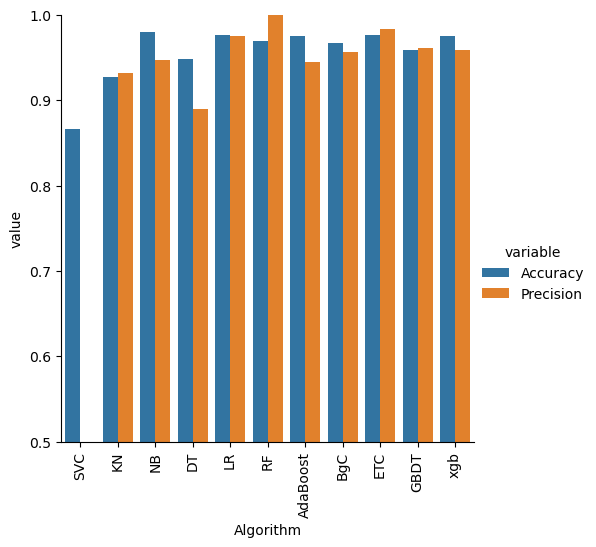

In [92]:
sns.catplot(x = 'Algorithm', y='value',
           hue= 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

In [96]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))